
# [Random Forest](https://www.notion.so/mongmang/RandomForest-5855ef47ddda4b11afca5eefc63cb798)
   * dataset에서 샘플 데이터를 random으로 선택,
   * 샘플 데이터에서 feature을 random으로 선택해 decision tree 생성
## Bootstrapped Dataset 만들기 
   * (서로 다른 tree 만듦)
   * 기존 데이터셋에서 Bootstrp 기번을 통해 새로운 data set 생성
   * 기존 데이터 셋에서 반복을 허용하여 데이터를 뽑아낸 뒤, 기존 데이터 셋의 크기 만큼의 데이터 셋을 만듦
 

In [1]:
# 패키지 불러오기
from sklearn.datasets import load_iris
import pandas as pd

# 데이터 불러오기
iris = load_iris()

In [2]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
# 독립변수
iris_df = pd.DataFrame(
    data = iris['data'], 
    columns = ['sepal length','sepal width','petal length','petal width']
)

In [4]:
# 타겟 변수
iris_df['species'] = iris['target']

In [5]:
iris_df.head() # 0~1: setosa', 'versicolor', 'virginica'

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
X = iris_df.loc[:,:"petal width"]
y = iris_df['species']

## 데이터 분리


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### RandomForest  분류기 생성
Sklearn.ensemble 모듈은 분류, 회귀 및 이상 탐지를 위한 ensemble-based 방법을 포함

* `rfc.fit()`:입력 데이터를 이용해 분류기 학습함
* `rfc.predict()`: 입력 데이터의 분류 결과를 예측함
* `rfc.score()`: 정확도 측정

In [8]:
from sklearn.ensemble import RandomForestClassifier

# 10개 트리를 가진  random forest 생성
rfc = RandomForestClassifier(n_estimators= 10, oob_score= True)

rfc.fit(X_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


RandomForestClassifier(n_estimators=10, oob_score=True)

In [9]:
rfc_pred = rfc.predict(X_test)

In [10]:
#정확도 측정
rfc.score(X_test, y_test)

0.9333333333333333

In [11]:
rfc.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=344235318),
 DecisionTreeClassifier(max_features='auto', random_state=246624606),
 DecisionTreeClassifier(max_features='auto', random_state=1580632980),
 DecisionTreeClassifier(max_features='auto', random_state=446115000),
 DecisionTreeClassifier(max_features='auto', random_state=1142370365),
 DecisionTreeClassifier(max_features='auto', random_state=2014256295),
 DecisionTreeClassifier(max_features='auto', random_state=2100362494),
 DecisionTreeClassifier(max_features='auto', random_state=921811947),
 DecisionTreeClassifier(max_features='auto', random_state=135502958),
 DecisionTreeClassifier(max_features='auto', random_state=1284171663)]

## 시각화

In [12]:
from sklearn import tree
import pydotplus
from PIL import Image
from io import BytesIO

In [13]:
X_train.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')

In [14]:
dt_dot_data1 =tree.export_graphviz(
    rfc.estimators_[0], # 10번쩨 트리
    feature_names = X_train.columns, 
    class_names = ['setosa', 'versicolor', 'virginica'],
)

In [15]:
dt_dot_graph = pydotplus.graph_from_dot_data(dt_dot_data1).create_png()

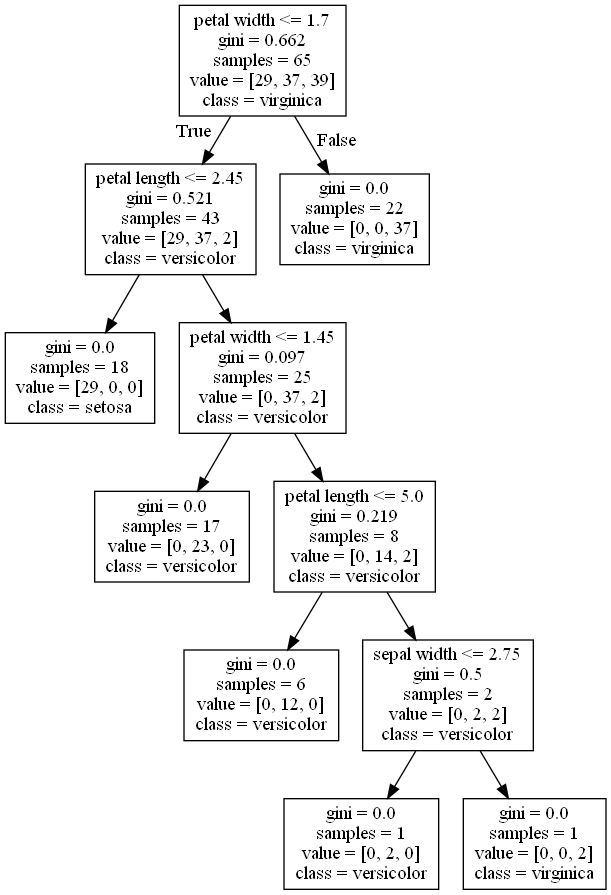

In [16]:
Image.open(BytesIO(dt_dot_graph))

In [17]:
%mkdir RFgraph

A subdirectory or file RFgraph already exists.


In [18]:
%cd RFgraph

c:\ai\workspace\spark\RFgraph


In [19]:
# 트리 10개 모두 다 그래프로 뽑기
for i in range(10):
    dt_dot_data =tree.export_graphviz(
    rfc.estimators_[i], # 첫번쩨 트리
    feature_names = X_train.columns, 
    class_names = ['setosa', 'versicolor', 'virginica'],
    )
    pydotplus.graph_from_dot_data(dt_dot_data).write_pdf("tree"+str(i+1)+".pdf")

In [20]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is B06D-416C

 Directory of c:\ai\workspace\spark\RFgraph

2021-05-10  오전 10:42    <DIR>          .
2021-05-10  오전 10:42    <DIR>          ..
2021-05-10  오전 10:42    <DIR>          RFgraph
2021-05-10  오전 11:40            26,578 tree1.pdf
2021-05-10  오전 11:40            26,725 tree10.pdf
2021-05-10  오전 11:40            26,574 tree2.pdf
2021-05-10  오전 11:40            26,685 tree3.pdf
2021-05-10  오전 11:40            26,137 tree4.pdf
2021-05-10  오전 11:40            26,906 tree5.pdf
2021-05-10  오전 11:40            25,879 tree6.pdf
2021-05-10  오전 11:40            26,563 tree7.pdf
2021-05-10  오전 11:40            26,366 tree8.pdf
2021-05-10  오전 11:40            25,472 tree9.pdf
              10 File(s)        263,885 bytes
               3 Dir(s)  117,304,770,560 bytes free


## oob_score
일반화 오류를 추정하기 위해 가방 외부 샘플 사용 여부

In [21]:
# leaf에서 각 칼럼 사용 비율
# oob_score = True일 때 가능
f_importance = rfc.feature_importances_
# 변수 명이랑 함께 보기
list(zip(X_train.columns, f_importance))

[('sepal length', 0.03262445251515888),
 ('sepal width', 0.007159647380960638),
 ('petal length', 0.347193592161531),
 ('petal width', 0.6130223079423496)]

## 예측 정확도 계산하기

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(y_test, rfc_pred)

0.9333333333333333

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
confusion_matrix(y_test, rfc_pred) #  실제X예측

array([[16,  0,  0],
       [ 0, 14,  1],
       [ 0,  2, 12]], dtype=int64)

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.88      0.93      0.90        15
           2       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



# Desicion Tree 비교하기

In [27]:
# 의사 결정 나무 트리, 그래프 그리기 
from sklearn.tree import DecisionTreeClassifier

In [28]:
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

In [29]:
accuracy_score(y_test, dt_pred).round(4)

0.9111

In [30]:
print('dt_clf_accuracy:', accuracy_score(y_test, dt_pred).round(4))
print('rf_clf_accuracy:',accuracy_score(y_test, rfc_pred).round(4))

dt_clf_accuracy: 0.9111
rf_clf_accuracy: 0.9333


랜덤 포레스트 모델이 의사결정 나무보다 정확도가 더 높다!

# RandomForest 성능 비교
## imbalanced data vs balanced data
* imbalanced data는 data split 할 때 슬라이싱하여 분류값 2를 작게 만들 예정

In [31]:
# 타겟 변수의 클래스 확인하기
iris_df['species'].value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

In [32]:
imblanced_data = iris_df[:-45]
imblanced_data['species'].value_counts()

1    50
0    50
2     5
Name: species, dtype: int64

In [33]:
X_train_im, X_test_im, y_train_im, y_test_im = train_test_split(X, y, test_size = 0.3)

In [34]:
rfc_im = RandomForestClassifier(n_estimators= 10, oob_score= True)
rfc_im.fit(X_train_im, y_train_im)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


RandomForestClassifier(n_estimators=10, oob_score=True)

In [35]:
rfc_im_pred = rfc_im.predict(X_test_im)

In [36]:
print("balanced: ", rfc.score(X_test, y_test))
print("imbalanced: ", rfc_im.score(X_test_im, y_test_im))

balanced:  0.9333333333333333
imbalanced:  0.9111111111111111


# SMOTE를 활용한 오버 샘플링

In [37]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE


In [38]:
# 모델설정
sm = SMOTE(random_state=0)

In [39]:
# train데이터를 넣어 복제함
X_resampled, y_resampled = sm.fit_sample(X_train_im,list(y_train_im))

print('SMOTE 적용 후 학습용 x/y 데이터: ', X_resampled.shape, len(y_resampled))
print('SMOTE 적용 후 y 값 분포: \n', pd.Series(y_resampled).value_counts())

SMOTE 적용 후 학습용 x/y 데이터:  (114, 4) 114
SMOTE 적용 후 y 값 분포: 
 2    38
1    38
0    38
dtype: int64


In [40]:
rfc_re = RandomForestClassifier(n_estimators= 10, oob_score= True)
rfc_re.fit(X_resampled, y_resampled)

RandomForestClassifier(n_estimators=10, oob_score=True)

In [41]:
rfc_re_pred = rfc_re.predict(X_test_im)

In [42]:
print("balanced: ", rfc.score(X_test, y_test))
print("imbalanced: ", rfc_im.score(X_test_im, y_test_im))
print("oversampling: ", rfc_re.score(X_test_im, y_test_im))

balanced:  0.9333333333333333
imbalanced:  0.9111111111111111
oversampling:  0.9333333333333333


## n_estimators , max_features 조정

In [65]:
rfc_re2 = RandomForestClassifier(n_estimators= 100, max_features= 4, oob_score= True)
rfc_re2.fit(X_resampled, y_resampled)

RandomForestClassifier(max_features=4, oob_score=True)

In [66]:
rfc_re_pred2 = rfc_re.predict(X_test_im)

In [67]:
print("balanced: ", rfc.score(X_test, y_test))
print("imbalanced: ", rfc_im.score(X_test_im, y_test_im))
print("oversampling: ", rfc_re.score(X_test_im, y_test_im))
print("fitting n_estimators: ", rfc_re.score(X_test_im, y_test_im))

balanced:  0.9333333333333333
imbalanced:  0.9111111111111111
oversampling:  0.9333333333333333
fitting n_estimators:  0.9333333333333333
